#    1. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

- Objective : Memepercepat proses analisis kepada calon DPK kita untuk membuka deposito kepada bank portugis

- Nama : Fahmi Suwandhi
- Batch : 10

# 2. Import Libraries

> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library Input missing Value
from sklearn.impute import SimpleImputer

# Handling outlier
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Library Splitting Data
from sklearn.model_selection import train_test_split

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Feature Encoding using OneHoTEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Features Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier


# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load data 
df = pd.read_csv("bank-additional-full.csv", sep=";")
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Exp :
> kita dapat melihat ukuran dari data kita memiliki 41188 baris dan 21 kolom

In [3]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:xlabel='job', ylabel='count'>

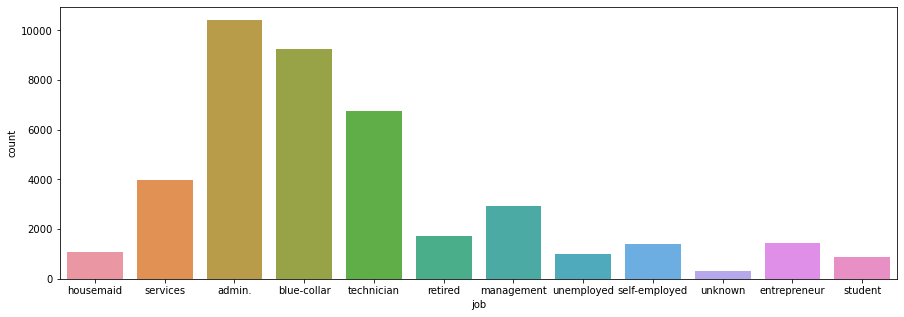

In [4]:
# Visualisasi calon DPK berdasarkan jenis pekerjaan
plt.figure(figsize=(15, 5))
sns.countplot(x=df['job'])

- Exp :
    > Diagram diatas menunjukan jenis perkerjaan dari calon DPK, dapat kita lihat dari 41188 nasabah berhasil di terlefon oleh bag telemarketing kita, ada sekitar 10.000 nasabah berkerja sebagai admin di perusahaannya

<AxesSubplot:xlabel='job', ylabel='count'>

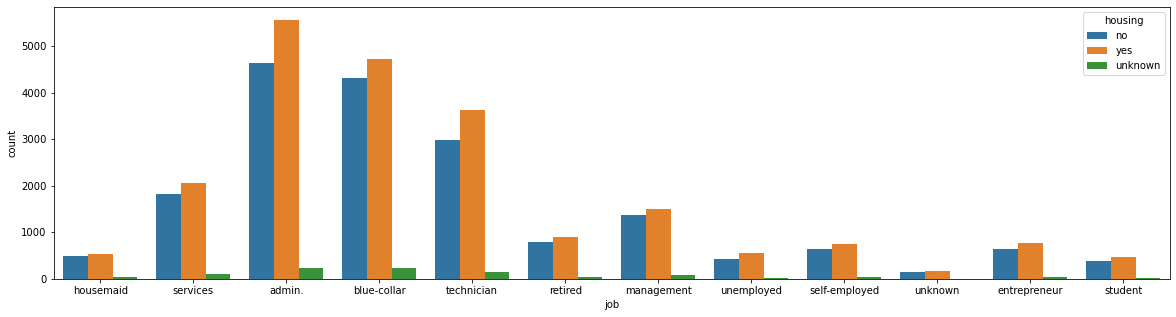

In [5]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='job', hue='housing')

<AxesSubplot:xlabel='job', ylabel='count'>

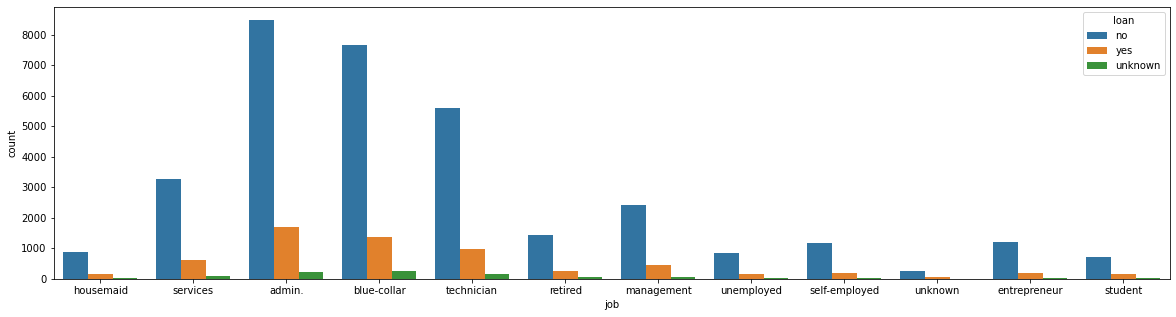

In [6]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='job', hue='loan')

<AxesSubplot:xlabel='marital', ylabel='count'>

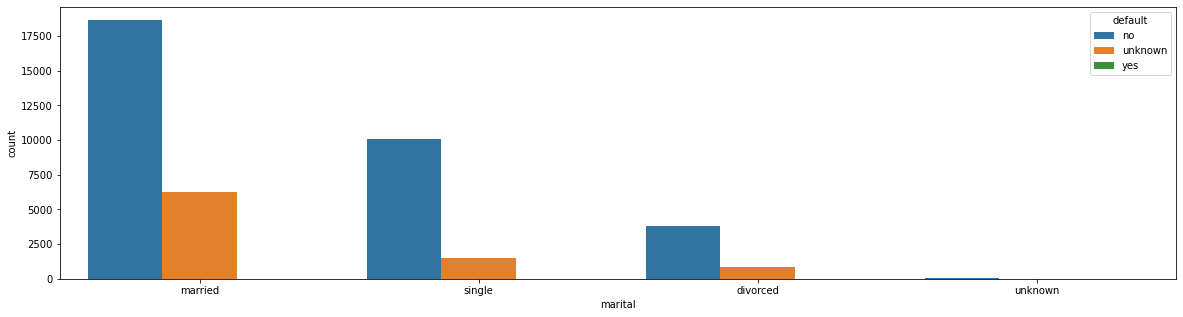

In [7]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='marital', hue='default')

<AxesSubplot:xlabel='education', ylabel='count'>

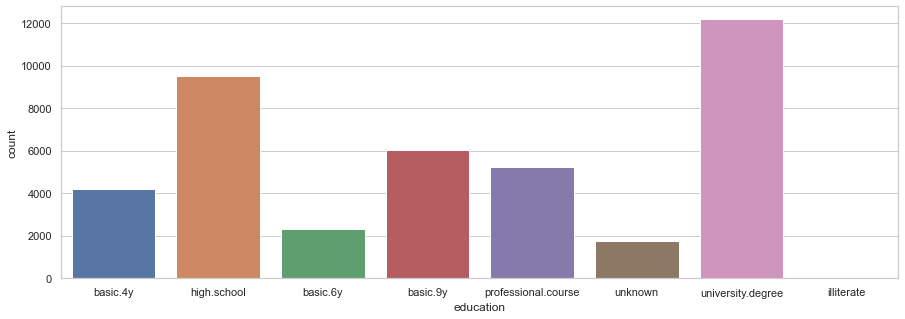

In [8]:
# Visualisasi calon DPK berdasarkan Latar belakang pendidikan
sns.set(style='whitegrid')
plt.figure(figsize=(15, 5))
sns.countplot(x=df['education'])

- Exp :
    > Ada beberapa latar belakang pendidikan dalam data yang kita dapat dan didominasi gelar universitas kedua sekolah menengah

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Cek unique value pada kolom kategorik
print ('Job unique :')
print (df['job'].unique())
print ('*******************************************************************')
print ('Marital unique :')
print (df['marital'].unique())
print ('*******************************************************************')
print ('Education unique :')
print (df['education'].unique())
print ('*******************************************************************')
print ('Default unique :')
print (df['default'].unique())
print ('*******************************************************************')
print ('Housing unique :')
print (df['housing'].unique())
print ('*******************************************************************')
print ('Loan unique :')
print (df['loan'].unique())
print ('*******************************************************************')
print ('Contact unique :')
print (df['contact'].unique())
print ('*******************************************************************')
print ('Month unique :')
print (df['month'].unique())
print ('*******************************************************************')
print ('day_of_week unique :')
print (df['day_of_week'].unique())
print ('*******************************************************************')
print ('poutcome unique :')
print (df['poutcome'].unique())
print ('*******************************************************************')

Job unique :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
*******************************************************************
Marital unique :
['married' 'single' 'divorced' 'unknown']
*******************************************************************
Education unique :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
*******************************************************************
Default unique :
['no' 'unknown' 'yes']
*******************************************************************
Housing unique :
['no' 'yes' 'unknown']
*******************************************************************
Loan unique :
['no' 'yes' 'unknown']
*******************************************************************
Contact unique :
['telephone' 'cellular']
*******************************************************************
Month uni

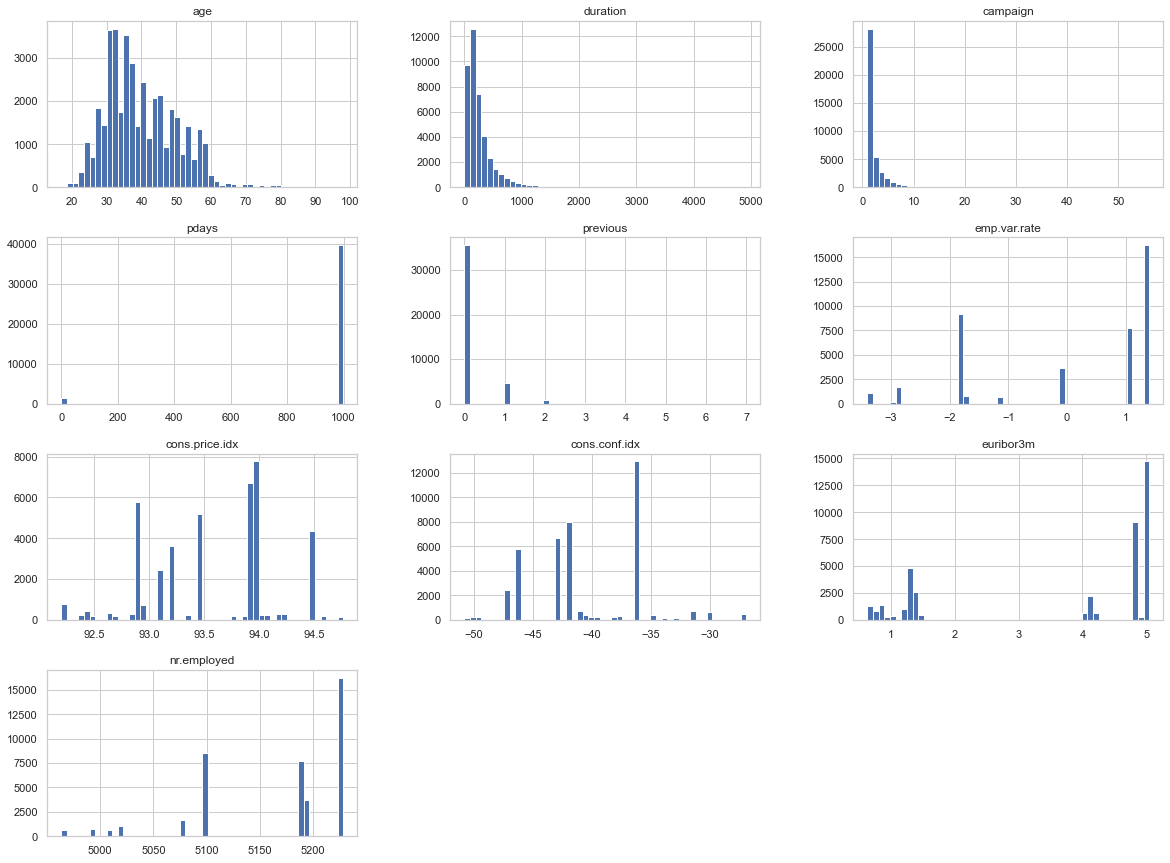

In [11]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))

plt.show()

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### 5.1 Data Inference

In [12]:
# Mengambil data inference dari data set
df_inf = df.sample(10, random_state=9)

# Remove Inference-Set dari Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

# Reset Index 
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,student,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,36,management,married,university.degree,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,no
2,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
3,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
4,35,technician,married,university.degree,no,no,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
5,35,self-employed,married,high.school,no,no,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
6,38,student,divorced,unknown,no,no,no,cellular,may,tue,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
7,33,services,single,high.school,no,no,no,telephone,may,mon,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,38,unemployed,divorced,professional.course,no,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
9,51,admin.,married,basic.9y,no,no,yes,cellular,nov,tue,...,5,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


#### 5.2 Split Dataset

In [13]:
# Split between X (features) and y (target)

X = df_train_test.drop('y', axis=1)
y = df_train_test['y']

# Split untuk Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('y_train Size  : ', y_train.shape)
print('y_test Size  : ', y_test.shape)

Train Size :  (32942, 20)
Test Size  :  (8236, 20)
y_train Size  :  (32942,)
y_test Size  :  (8236,)


In [14]:
# Mendapatkan Numerical Columns and Categorical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Split Train-Set and Test-Set berdasrkan tipe kolom (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Label Encode
y_train = y_train.replace({'yes':0,'no':1})
y_test = y_test.replace({'yes':0,'no':1})

#### 5.3 Handling Missing value

In [15]:
# Cek Missing value
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(y_test.isnull().sum().sum())
print('total missing values = ', X_train.isnull().sum().sum() + X_test.isnull().sum().sum() + y_train.isnull().sum().sum() + y_test.isnull().sum().sum())

0
0
0
0
total missing values =  0


- Exp :
    > Setelah kita melakukan pengecekan, tidak terdapat kolom missing pada X_train X_test Y_train dan Y_test 

In [16]:
# Mengisi kolom Missing pada tipe data object pada X_train
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(X_train_cat)
X = imputer_cat.transform(X_train_cat)

X_train_cat_tr = pd.DataFrame(X, columns=X_train_cat.columns, index=X_train_cat.index)
print (X_train_cat_tr.shape)

# Mengisi kolom Missing pada tipe data object pada X_test
imputer_cat.fit(X_test_cat)
X2 = imputer_cat.transform(X_test_cat)

X_test_cat_tr = pd.DataFrame(X2, columns=X_test_cat.columns, index=X_test_cat.index)
print (X_test_cat_tr.shape)

(32942, 10)
(8236, 10)


#### 5.4 Handling Outliers

In [17]:
#Cek Skewness
skew1 = []
for i in num_columns:
    skew1.append(abs(X_train[i].skew()))

# Visualisasi ke data frame
df_skew1 = pd.DataFrame({'Kolom':num_columns, 'Skewness_abs':skew1})
df_skew1['normal'] = df_skew1.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew1

,Kolom,Skewness_abs,normal
0,age,0.782637,False
1,duration,3.323240,False
2,campaign,4.832333,False
3,pdays,4.876558,False
4,previous,3.868771,False
5,emp.var.rate,0.727119,False
6,cons.price.idx,0.238369,True
7,cons.conf.idx,0.311376,True
8,euribor3m,0.711283,False
9,nr.employed,1.044708,False


- Exp :
    > Untuk kolom cons.price.idx dan cons.conf.idx terdistribusi normal sedangkan kolom numerik lainnya skewed

In [18]:
# Cek Persentasi untuk kolom yg terdistribusi normal
percent_outliers1 = []
for i in ['cons.price.idx', 'cons.conf.idx']:
    std = X_train[i].std()
    upper = X_train[i].mean() + 3*std
    lower = X_train[i].mean() - 3*std
    percent = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])*100/len(X_train)
    percent_outliers1.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['cons.price.idx', 'cons.conf.idx'], 'persentasi_outlier':percent_outliers1})

,Kolom,persentasi_outlier
0,cons.price.idx,0.0
1,cons.conf.idx,0.0


- Exp :
    > Jumlah outlier pada kolom cons.price.idx dan cons.conf.idx 0%

In [19]:
# Cek Persentasi untuk kolom yg terdistribusi skewed
percent_outliers2 = []
num = 3
for i in ['age', 'duration','campaign','pdays','previous','emp.var.rate','euribor3m','nr.employed']:
    q1 = np.quantile(X_train[i], 0.25)
    q3 = np.quantile(X_train[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    percent = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])*100/len(X_train)
    percent_outliers2.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['age', 'duration','campaign','pdays','previous','emp.var.rate','euribor3m','nr.employed'], 'persentasi_outlier':percent_outliers2})

,Kolom,persentasi_outlier
0,age,0.012143
1,duration,2.507437
2,campaign,2.683504
3,pdays,3.739907
4,previous,13.718050
5,emp.var.rate,0.000000
6,euribor3m,0.000000
7,nr.employed,0.000000


- Exp :
    > - Jumlah outlier untuk kolom nr.employed euribor3m emp.var.rate adalah 0%
    > - sedangkan untuk kolom previous pdays campaign duration cukup besar persentasinya
    > - Untuk kolom age cukup kecil persentasi terhadap outlier nya jadi dapat kita biarkan saja

In [20]:
# Outlier pada kolom campaign 
num = 3
q1 = np.quantile(X_train['campaign'], 0.25)
q3 = np.quantile(X_train['campaign'], 0.75)
iqr = q3 - q1
upper1 = q3 + num*iqr
lower1 = q1 - num*iqr
X_train[(X_train['campaign']>upper1)|(X_train['campaign']<lower1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16278,34,blue-collar,married,unknown,no,no,yes,cellular,jul,tue,44,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
22857,40,admin.,married,university.degree,no,no,no,cellular,aug,mon,23,12,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
22883,30,technician,single,university.degree,no,yes,no,cellular,aug,mon,14,13,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
37866,29,admin.,single,university.degree,no,yes,yes,cellular,aug,mon,121,12,999,0,nonexistent,-2.9,92.201,-31.4,0.821,5076.2
3286,37,admin.,divorced,high.school,no,no,no,telephone,may,thu,51,10,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23637,34,admin.,married,university.degree,no,yes,yes,telephone,aug,thu,19,10,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1
10575,32,unemployed,single,high.school,unknown,no,no,telephone,jun,tue,34,11,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
31037,31,admin.,married,unknown,no,yes,no,cellular,may,wed,7,11,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1
23588,40,technician,divorced,professional.course,no,no,yes,cellular,aug,thu,49,22,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1


In [21]:
# Melakukan capping terhadap outlier skewed
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration', 'campaign', 'pdays','previous'])

# Melakukan capping terha
windsoriser.fit(X_train_num)

X_train_num_cap = windsoriser.transform(X_train_num)

print (X_train_num.shape)
print (X_train_num_cap.shape)

(32942, 10)
(32942, 10)


In [22]:
# Print sebelum dan sesudah capping
print('X_train Dataframe - Before Capping')
print(X_train_num.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_num_cap.describe())

X_train Dataframe - Before Capping
                age      duration      campaign         pdays      previous  \
count  32942.000000  32942.000000  32942.000000  32942.000000  32942.000000   
mean      40.026228    258.558952      2.571246    961.861393      0.174580   
std       10.433678    260.146389      2.810145    188.420549      0.499871   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  32942.000000    32942.000000   32942.000000  32942.000000  32942.000000  
mean       0.081783       93.574550     -40.485902      3.622361   5167.068402  
std       

#### 5.5 Features Selection

In [23]:
features_cat = X_train_cat

# Encode categorical column
encoder = LabelEncoder() 

for i in features_cat:
    if features_cat[i].dtypes == 'object':
        features_cat[i] = encoder.fit_transform(features_cat[i])

features_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
38185,5,0,0,0,0,0,0,8,3,1
32074,0,0,6,0,2,0,0,6,0,0
10699,2,2,6,0,0,0,1,4,3,1
11276,1,1,0,0,0,0,1,4,2,1
24382,1,1,2,0,2,2,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...
31044,1,2,2,1,2,0,0,6,4,1
25631,7,0,3,0,0,0,0,7,4,1
33174,0,2,6,0,2,0,0,6,3,1
34959,1,1,2,1,2,0,0,6,0,0


Text(0.5, 1.0, 'Korelasi pada kolom Kategori')

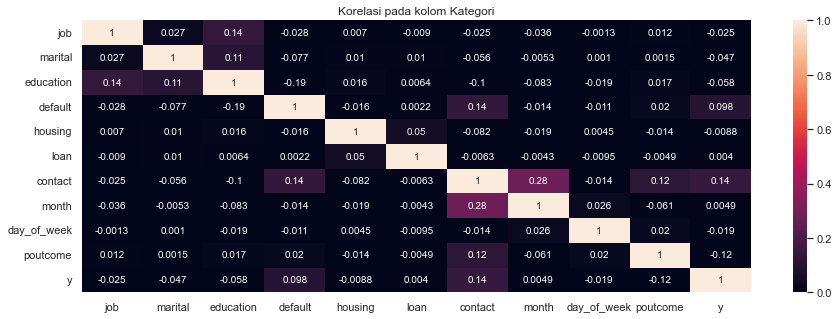

In [24]:
# Cek kolerasi pada kolom categorikal
df_corr_cat_y = pd.concat([features_cat, y_train], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_corr_cat_y.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori')

Text(0.5, 1.0, 'Korelasi pada kolom Kategori')

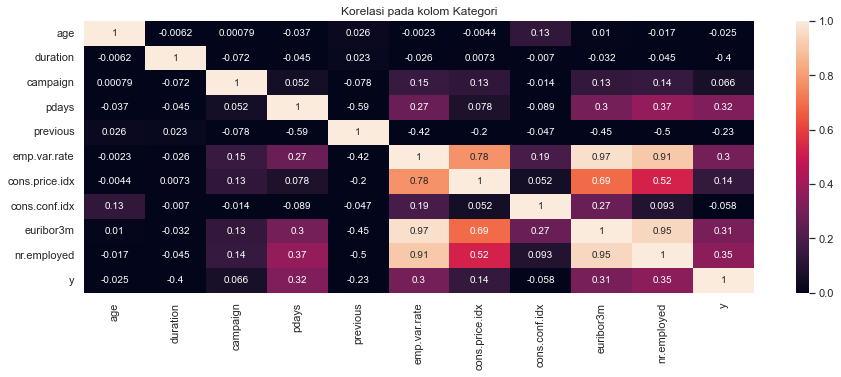

In [25]:
# Cek Kolerasi Kolom Numerik
df_cor_num_y = pd.concat([X_train_num,y_train], axis=1)

plt.figure(figsize=(15, 5))
sns.heatmap(df_cor_num_y.corr(), annot = True, vmin=0, vmax=1)
plt.title('Korelasi pada kolom Kategori')

- Exp :
    > - untuk kolom kategorikal saya akan memakai features : Job, Education, Default, Housing, Loan, contact, dan Poutcome
    > - Pada kolom Job Housing dan Loan walaupun kolerasi nya rendah tetapi tetap saya pakai karena saya berasumsi akan berperngaruh terhadap kolom target
    > - Untuk Kolom Numerikal saya akan memakai feature : Campaign, Emp.var.rate, Cross.price.idx, cons.conf.idx, Euribor3m, Nr.employed
    > - Pada kolom Pdays dan previous saya memiliki asumsi bahwa keterkaitannya tidak kuat
    > - dan untuk kolom Duration pihak bisnis berstatment jika ingin memiliki model prediksi yang realistis kolom ini harus dibuang

In [26]:
# simpan Features selection kedalam variabel
cat_columns_select = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'] # Total 7 kolom
num_columns_select = ['campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] #total 6 kolom

print('Categorical column selected: ', cat_columns)
print('Numerikal column selected: ', num_columns)

Categorical column selected:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerikal column selected:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [27]:
# Split dataset yang sudah dilakukan selection
X_train_fet_cat = X_train_cat_tr[cat_columns_select]
X_test_fet_cat = X_test_cat_tr[cat_columns_select]

X_train_fet_num = X_train_num_cap[num_columns_select]
X_test_fet_num = X_test_num[num_columns_select]

print (X_train_fet_cat.shape)
print (X_train_fet_num.shape)
print (X_test_fet_cat.shape)
print (X_test_fet_num.shape)

(32942, 7)
(32942, 6)
(8236, 7)
(8236, 6)


#### 5.6 Scaling dan Encoding

In [28]:
# Scaling data numerik
scaler = MinMaxScaler()
scaler.fit(X_train_fet_num)

X_train_scaled = scaler.transform(X_train_fet_num)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = num_columns_select

X_test_scaled  = scaler.transform(X_test_fet_num)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = num_columns_select

# Cek Baris dan kolom
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(32942, 6)
(8236, 6)


In [29]:
# One Hot Encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train_fet_cat)
X_train_enc = encoder.transform(X_train_fet_cat)
X_test_enc = encoder.transform(X_test_fet_cat)

# Di bentuk dalam data Frame
X_train_enc = pd.DataFrame(X_train_enc)
X_test_enc = pd.DataFrame(X_test_enc)
X_train_enc.columns = encoder.get_feature_names()
X_test_enc.columns = encoder.get_feature_names()

# Print Baris dan Kolom
print(X_train_enc.shape)
print(X_test_enc.shape)


(32942, 34)
(8236, 34)


In [30]:
# Menggabungkan data Numerikal dan kategorikal pada X_train dan X_test
X_train_final = X_train_scaled.join(X_train_enc)
X_test_final = X_test_scaled.join(X_test_enc)

In [31]:
print(X_train_final.shape)
print(X_test_final.shape)

(32942, 40)
(8236, 40)


# 6. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [32]:
# Model Logistic Regresion
# Inisiasi Model Logistic Regresion
model_logreg = LogisticRegression()
model_logreg.fit(X_train_final,y_train)

# Model SVC
# Inisiasi Model SVC
model_svc = SVC()
model_svc.fit(X_train_final,y_train)

# Model Random Forest
# Inisiasi Model Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_final,y_train)

# Model Decision Tree
# Inisiasi Model Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_final,y_train)

# Model KNN
# Inisiasi Model KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_final,y_train)

# Model Naive Bayes
# Inisiasi Model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_final,y_train)

# Model Bagging Classifier
# Inisiasi Model Bagging Classifier
model_bag = BaggingClassifier()
model_bag.fit(X_train_final,y_train)


BaggingClassifier()

# 7. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### 7.1 Model Train

In [33]:
#Logistic Regresion
# Melakukan Train Model terhadap Data Train
y_pred_Trainlog = model_logreg.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_Testlog = model_logreg.predict(X_test_final)

# Model SVC
# Melakukan Train Model terhadap Data Train
y_pred_TrainSVC = model_svc.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestSVC = model_svc.predict(X_test_final)

# Random Forest
# Melakukan Train Model terhadap Data Train
y_pred_TrainRF = model_rf.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestRF = model_rf.predict(X_test_final)

# Decision Tree
# Melakukan Train Model terhadap Data Train
y_pred_TrainDT = model_dt.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestDT = model_dt.predict(X_test_final)

# KNN
# Melakukan Train Model terhadap Data Train
y_pred_TrainKNN = model_knn.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestKNN = model_knn.predict(X_test_final)

# Naive Bayes
# Melakukan Train Model terhadap Data Train
y_pred_TrainNB = model_nb.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestNB = model_nb.predict(X_test_final)

# Bagging Classifier
# Melakukan Train Model terhadap Data Train
y_pred_TrainBG = model_bag.predict(X_train_final)
# Melakukan Traing Model terhadap Data Test
y_pred_TestBG = model_bag.predict(X_test_final)

#### 7.2 Cross Validation

In [34]:
# Cross Validation Model Logistic Regresion
train_crossval_logreg = cross_val_score(model_logreg, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_logreg)
print('Accuracy - Mean - Cross Validation : ', train_crossval_logreg.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_logreg.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_logreg.mean()-train_crossval_logreg.std()) , '-', (train_crossval_logreg.mean()+train_crossval_logreg.std()))

Accuracy - All - Cross Validation  :  [0.89918951 0.90019124 0.89936248]
Accuracy - Mean - Cross Validation :  0.899581075265678
Accuracy - Std - Cross Validation  :  0.0004371915709748102
Accuracy - Range of Test-Set       :  0.8991438836947032 - 0.9000182668366528


In [35]:
# Cross Validation Model SVC
train_crossval_svc = cross_val_score(model_svc, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_svc)
print('Accuracy - Mean - Cross Validation : ', train_crossval_svc.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_svc.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_svc.mean()-train_crossval_svc.std()) , '-', (train_crossval_svc.mean()+train_crossval_svc.std()))

Accuracy - All - Cross Validation  :  [0.89882524 0.89873418 0.89763206]
Accuracy - Mean - Cross Validation :  0.8983971597018575
Accuracy - Std - Cross Validation  :  0.000542284305555311
Accuracy - Range of Test-Set       :  0.8978548753963022 - 0.8989394440074129


In [36]:
# Cross Validation Model Random Forest
train_crossval_rf = cross_val_score(model_rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_rf)
print('Accuracy - Mean - Cross Validation : ', train_crossval_rf.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_rf.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_rf.mean()-train_crossval_rf.std()) , '-', (train_crossval_rf.mean()+train_crossval_rf.std()))

Accuracy - All - Cross Validation  :  [0.88598488 0.88716875 0.88369763]
Accuracy - Mean - Cross Validation :  0.8856170870179417
Accuracy - Std - Cross Validation  :  0.0014407436572127011
Accuracy - Range of Test-Set       :  0.884176343360729 - 0.8870578306751544


In [37]:
# Cross Validation Model Decision Tree
train_crossval_dt = cross_val_score(model_dt, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_dt)
print('Accuracy - Mean - Cross Validation : ', train_crossval_dt.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_dt.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_dt.mean()-train_crossval_dt.std()) , '-', (train_crossval_dt.mean()+train_crossval_dt.std()))

Accuracy - All - Cross Validation  :  [0.84527821 0.84564247 0.83770492]
Accuracy - Mean - Cross Validation :  0.8428751997364549
Accuracy - Std - Cross Validation  :  0.0036589645182862635
Accuracy - Range of Test-Set       :  0.8392162352181686 - 0.8465341642547412


In [38]:
# Cross Validation Model KNN
train_crossval_knn = cross_val_score(model_knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_knn)
print('Accuracy - Mean - Cross Validation : ', train_crossval_knn.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_knn.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_knn.mean()-train_crossval_knn.std()) , '-', (train_crossval_knn.mean()+train_crossval_knn.std()))

Accuracy - All - Cross Validation  :  [0.891631   0.89363446 0.89107468]
Accuracy - Mean - Cross Validation :  0.8921133799192921
Accuracy - Std - Cross Validation  :  0.0010992830173813949
Accuracy - Range of Test-Set       :  0.8910140969019107 - 0.8932126629366735


In [39]:
# Cross Validation Model Naive Bayes
train_crossval_nb = cross_val_score(model_nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_nb)
print('Accuracy - Mean - Cross Validation : ', train_crossval_nb.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_nb.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_nb.mean()-train_crossval_nb.std()) , '-', (train_crossval_nb.mean()+train_crossval_nb.std()))

Accuracy - All - Cross Validation  :  [0.62161916 0.63965031 0.61393443]
Accuracy - Mean - Cross Validation :  0.625067963889938
Accuracy - Std - Cross Validation  :  0.01077798034468787
Accuracy - Range of Test-Set       :  0.6142899835452501 - 0.6358459442346259


In [40]:
# Cross Validation Model Bagging Classifier
train_crossval_bag = cross_val_score(model_bag, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', train_crossval_bag)
print('Accuracy - Mean - Cross Validation : ', train_crossval_bag.mean())
print('Accuracy - Std - Cross Validation  : ', train_crossval_bag.std())
print('Accuracy - Range of Test-Set       : ', (train_crossval_bag.mean()-train_crossval_bag.std()) , '-', (train_crossval_bag.mean()+train_crossval_bag.std()))

Accuracy - All - Cross Validation  :  [0.87760678 0.87341772 0.87431694]
Accuracy - Mean - Cross Validation :  0.8751138122496399
Accuracy - Std - Cross Validation  :  0.0018006104787961553
Accuracy - Range of Test-Set       :  0.8733132017708437 - 0.8769144227284361


# 8. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

#### 8.1 Model Against Test

In [41]:
# Check Performance Model against Test-Set Logistic Regresion

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_Testlog), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_Testlog), '\n')

Accuracy - Train Set  :  0.897887323943662 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.19      0.30       962
           1       0.90      0.99      0.94      7274

    accuracy                           0.90      8236
   macro avg       0.82      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236
 



In [42]:
# Check Performance Model against Train-Set SVC

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestSVC), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestSVC), '\n')

Accuracy - Train Set  :  0.8984944147644488 

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.19      0.30       962
           1       0.90      0.99      0.95      7274

    accuracy                           0.90      8236
   macro avg       0.84      0.59      0.62      8236
weighted avg       0.89      0.90      0.87      8236
 



In [43]:
# Check Performance Model against Train-Set Random Forest

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestRF), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestRF), '\n')

Accuracy - Train Set  :  0.8838028169014085 

Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.29      0.37       962
           1       0.91      0.96      0.94      7274

    accuracy                           0.88      8236
   macro avg       0.71      0.62      0.65      8236
weighted avg       0.86      0.88      0.87      8236
 



In [44]:
# Check Performance Model against Train-Set Decision Tree

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestDT), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestDT), '\n')

Accuracy - Train Set  :  0.8442204953861098 

Classification Report : 
               precision    recall  f1-score   support

           0       0.34      0.34      0.34       962
           1       0.91      0.91      0.91      7274

    accuracy                           0.84      8236
   macro avg       0.62      0.63      0.63      8236
weighted avg       0.85      0.84      0.84      8236
 



In [45]:
# Check Performance Model against Train-Set KNN

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestKNN), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestKNN), '\n')

Accuracy - Train Set  :  0.8875667799902865 

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.24      0.34       962
           1       0.91      0.97      0.94      7274

    accuracy                           0.89      8236
   macro avg       0.72      0.61      0.64      8236
weighted avg       0.86      0.89      0.87      8236
 



In [46]:
# Check Performance Model against Train-Set Naive Bayes

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestNB), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestNB), '\n')

Accuracy - Train Set  :  0.6407236522583779 

Classification Report : 
               precision    recall  f1-score   support

           0       0.21      0.76      0.33       962
           1       0.95      0.62      0.75      7274

    accuracy                           0.64      8236
   macro avg       0.58      0.69      0.54      8236
weighted avg       0.87      0.64      0.70      8236
 



In [47]:
# Check Performance Model against Train-Set Bagging Classifier

print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_TestBG), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_TestBG), '\n')

Accuracy - Train Set  :  0.8779747450218552 

Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.35      0.40       962
           1       0.92      0.95      0.93      7274

    accuracy                           0.88      8236
   macro avg       0.69      0.65      0.66      8236
weighted avg       0.86      0.88      0.87      8236
 



#### 8.2 Hyperparameter tunning

In [48]:
n_estimators = [10, 1000, 10]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'criterion':['entropy','gini']}
param_grid

{'n_estimators': [10, 1000, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['entropy', 'gini']}

In [49]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=2,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_final, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 1000, 10]},
             verbose=2)

#### 8.3 GridsearchCV

In [50]:
# Mendapatkan parameter terbaik
rf_gridcv.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}

In [51]:
# Mendapatkan estimator terbaik
rf_gridcv_best = rf_gridcv.best_estimator_

### 8.4 Predict setelah hyperparameter tuning

In [52]:
# Check Performance Model against Train-Set Random Forest

y_pred_best = rf_gridcv_best.predict(X_test_final)
print('Accuracy - Train Set  : ', accuracy_score(y_test, y_pred_best), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_best), '\n')

Accuracy - Train Set  :  0.8838028169014085 

Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.29      0.37       962
           1       0.91      0.96      0.94      7274

    accuracy                           0.88      8236
   macro avg       0.71      0.63      0.65      8236
weighted avg       0.86      0.88      0.87      8236
 



# 9. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [53]:
# Cek kembali data inference yg sudah kita split di awal
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,student,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,36,management,married,university.degree,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,no
2,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
3,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
4,35,technician,married,university.degree,no,no,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
5,35,self-employed,married,high.school,no,no,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
6,38,student,divorced,unknown,no,no,no,cellular,may,tue,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
7,33,services,single,high.school,no,no,no,telephone,may,mon,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,38,unemployed,divorced,professional.course,no,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
9,51,admin.,married,basic.9y,no,no,yes,cellular,nov,tue,...,5,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


In [54]:
# Split data inference train dan test
X_inf = df_inf.drop('y', axis=1)
y_inf = df_inf['y']

# Split data numerik dan kategori
X_inf_cat = X_inf[cat_columns_select]
X_inf_num = X_inf[num_columns_select]

# Label Encode
y_inf = y_inf.replace({'yes':0,'no':1})

print (X_inf_cat.shape)
print (X_inf_num.shape)

(10, 7)
(10, 6)


In [55]:
# Hamdling missing value data inference kategori
imputer_catif = SimpleImputer(strategy="most_frequent")
imputer_catif.fit(X_inf_cat)
F1 = imputer_catif.transform(X_inf_cat)

inf_cat_in = pd.DataFrame(F1, columns=X_inf_cat.columns, index=X_inf_cat.index)

# Encode Feture kategori
inf_cat_in_enc = encoder.transform(inf_cat_in)

In [56]:
#Scaled Feature numerik
scaler.fit(X_inf_num)

X_inf_scaled = scaler.transform(X_inf_num)

In [57]:
# Concatined data inference
inf_final = np.concatenate([X_inf_scaled, inf_cat_in_enc], axis=1)

In [58]:
# Predict data inference dengan Best Hyperparameter Random forest
y_pred_inf = rf_gridcv_best.predict(inf_final)

In [59]:
# cek akurasi data inference
pred_acc = pd.DataFrame(y_pred_inf, columns=['y'])

Y = pd.concat([y_inf, pred_acc], axis=1)
Y

,y,y
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


# 10. Pengambilan Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

- Exp :
    > - Dari beberapa model yang kita uji coba adalah ensembel random RandomForest
    > - model random forest kita gunakan karena prediksi f1score terhadap X test lebih besar dibandingkan yang lainnya
    > - Ketika menggunakan hyperparameter tunning dengan GridSearchCV accuracy nya sedikit bertambah tetapi tidak signifikan
    > - Hal ini akan dapat di optimalisasi dengan melakukan data preprocessing lebih lanjut
    > - Dan juga melakukan set up param_grid dengan hyperparameter yang lebih kompleks